This is just a refernce code. The analysis is not done on metrics data but is performed on a dataset found online

In [1]:
import numpy as np 
import os
import pandas as pd 
import time
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
df1 = pd.read_csv("MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2 = pd.read_csv("MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3 = pd.read_csv("MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4 = pd.read_csv("MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
df5 = pd.read_csv("MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6 = pd.read_csv("MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7 = pd.read_csv("MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
df8 = pd.read_csv("MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")

In [3]:
df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8
df.shape

(2830743, 79)

In [5]:
df[' Label'].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

In [6]:
df.duplicated().sum()

308381

In [7]:
df.shape

(2830743, 79)

In [8]:
df =  df.drop_duplicates(keep="first")

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum().sort_values(ascending = False)

Flow Bytes/s             353
 Destination Port          0
 Bwd Avg Bytes/Bulk        0
 Fwd Avg Packets/Bulk      0
Fwd Avg Bytes/Bulk         0
                        ... 
 Bwd IAT Mean              0
Bwd IAT Total              0
 Fwd IAT Min               0
 Fwd IAT Max               0
 Label                     0
Length: 79, dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(2522009, 79)

In [13]:
df.isnull().sum().sort_values(ascending = False)

 Destination Port        0
 ECE Flag Count          0
 Fwd Avg Packets/Bulk    0
Fwd Avg Bytes/Bulk       0
 Fwd Header Length.1     0
                        ..
Bwd IAT Total            0
 Fwd IAT Min             0
 Fwd IAT Max             0
 Fwd IAT Std             0
 Label                   0
Length: 79, dtype: int64

In [14]:
df=df.groupby(' Label').filter(lambda x:len(x)>10000)
df[' Label'].value_counts()

BENIGN           2096134
DoS Hulk          172846
DDoS              128016
PortScan           90819
DoS GoldenEye      10286
Name:  Label, dtype: int64

In [15]:
integer = []
f = []
for i in df.columns[:-1]:
    if df[i].dtype == "int64": integer.append(i)
    else : f.append(i)

df[integer] = df[integer].astype("int32")
df[f] = df[f].astype("float32")

In [16]:
df.shape

(2498101, 79)

In [17]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

/tmp/ipykernel_7911/4277620578.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]


In [18]:
df.shape

(2496897, 79)

In [19]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
              colname = corr_matrix.columns[i]                  
              col_corr.add(colname)
    return col_corr

In [20]:
corr_features = correlation(df, 0.85)
corr_features

/tmp/ipykernel_7911/1360579028.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


{' Active Min',
 ' Average Packet Size',
 ' Avg Bwd Segment Size',
 ' Avg Fwd Segment Size',
 ' Bwd IAT Max',
 ' Bwd IAT Mean',
 ' Bwd IAT Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 ' CWE Flag Count',
 ' ECE Flag Count',
 ' Flow IAT Max',
 ' Fwd Header Length.1',
 ' Fwd IAT Max',
 ' Fwd IAT Mean',
 ' Fwd IAT Min',
 ' Fwd IAT Std',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 ' Idle Max',
 ' Idle Min',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' SYN Flag Count',
 ' Subflow Bwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Fwd Bytes',
 ' Total Backward Packets',
 ' Total Length of Bwd Packets',
 ' act_data_pkt_fwd',
 ' min_seg_size_forward',
 'Fwd IAT Total',
 'Fwd Packets/s',
 'Idle Mean',
 'Subflow Fwd Packets'}

In [21]:
df.drop(corr_features,axis=1,inplace=True)

In [22]:
x = df.drop([' Label'],axis=1)
y = df[' Label']

In [23]:
x.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,...,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,Active Mean,Active Std,Active Max,Idle Std
0,54865,3,2,12,6,6,0,0,4.000000e+06,666666.687500,...,0,0,0,0,33,-1,0.0,0.0,0,0.0
1,55054,109,1,6,6,6,6,6,1.100917e+05,18348.623047,...,0,0,0,0,29,256,0.0,0.0,0,0.0
2,55055,52,1,6,6,6,6,6,2.307692e+05,38461.539062,...,0,0,0,0,29,256,0.0,0.0,0,0.0
3,46236,34,1,6,6,6,6,6,3.529412e+05,58823.531250,...,0,0,0,0,31,329,0.0,0.0,0,0.0
4,54863,3,2,12,6,6,0,0,4.000000e+06,666666.687500,...,0,0,0,0,32,-1,0.0,0.0,0,0.0


In [25]:
x.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       'Total Length of Fwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Min', 'Bwd IAT Total',
       ' Bwd IAT Std', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags',
       ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length',
       ' Bwd Packets/s', ' Min Packet Length', 'FIN Flag Count',
       ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count',
       ' URG Flag Count', ' Down/Up Ratio', 'Fwd Avg Bytes/Bulk',
       ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk',
       ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', 'Active Mean', ' Active Std', ' Active Max',
       ' Idle Std'],
      dtype='object')

In [30]:
y.head()

0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name:  Label, dtype: object

In [31]:
rus = RandomUnderSampler(random_state=0)
rus.fit(x, y)
Xn, yn = rus.fit_resample(x, y)

In [32]:
Xn.head()
Xn.shape
input_data = Xn.iloc[2544]
input_data.dropna(inplace=True)
print(input_data)

 Destination Port              2.200000e+01
 Flow Duration                 1.574691e+06
 Total Fwd Packets             3.500000e+01
Total Length of Fwd Packets    2.622000e+03
 Fwd Packet Length Max         4.080000e+02
 Fwd Packet Length Min         0.000000e+00
Bwd Packet Length Max          9.760000e+02
 Bwd Packet Length Min         0.000000e+00
Flow Bytes/s                   6.134537e+03
 Flow Packets/s                4.889848e+01
 Flow IAT Mean                 2.071962e+04
 Flow IAT Std                  1.136277e+05
 Flow IAT Min                  1.000000e+00
Bwd IAT Total                  6.076490e+05
 Bwd IAT Std                   3.799710e+04
Fwd PSH Flags                  0.000000e+00
 Bwd PSH Flags                 0.000000e+00
 Fwd URG Flags                 0.000000e+00
 Bwd URG Flags                 0.000000e+00
 Fwd Header Length             7.240000e+02
 Bwd Header Length             8.640000e+02
 Bwd Packets/s                 2.667190e+01
 Min Packet Length             0

/tmp/ipykernel_10151/2721005591.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data.dropna(inplace=True)


In [33]:
cols = list(Xn.columns)
for col in cols:
    Xn[col] = stats.zscore(Xn[col])

In [34]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(Xn,yn,test_size=0.30,random_state=0)

In [35]:
print(np.any(np.isnan(X_train)))
print(np.all(np.isfinite(X_train)))

True
False


In [36]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with 'mean' strategy to replace NaN values
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to X_train and transform X_train and X_test with it
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Apply StandardScaler to X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC

start = time.time()
Random_Forest = RFC(max_depth=40) 
Random_Forest.fit(X_train, Y_train) 
print("Time taken to train model: ", time.time()-start," seconds")

Time taken to train model:  2.4175000190734863  seconds


In [38]:
from sklearn import metrics
Predict_X =  Random_Forest.predict(X_train)
scores = cross_val_score(Random_Forest, X_train, Y_train, cv=7)
accuracy = metrics.accuracy_score(Y_train,Predict_X)
confusion_matrix = metrics.confusion_matrix(Y_train, Predict_X)
classification = metrics.classification_report(Y_train, Predict_X)

In [39]:
print()
print('--------------------------- Results --------------------------------')
print()
print ("Cross Validation Mean Score:" "\n", scores.mean())
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print()


--------------------------- Results --------------------------------

Cross Validation Mean Score:
 0.9985555956778979

Model Accuracy:
 0.9998888919752229

Confusion matrix:
 [[7189    0    0    0    4]
 [   0 7205    0    0    0]
 [   0    0 7217    0    0]
 [   0    0    0 7165    0]
 [   0    0    0    0 7221]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      1.00      1.00      7193
         DDoS       1.00      1.00      1.00      7205
DoS GoldenEye       1.00      1.00      1.00      7217
     DoS Hulk       1.00      1.00      1.00      7165
     PortScan       1.00      1.00      1.00      7221

     accuracy                           1.00     36001
    macro avg       1.00      1.00      1.00     36001
 weighted avg       1.00      1.00      1.00     36001




In [40]:
def plot_confusion_matrix(cm,title,cmap=None,target=None,normalize=False):

    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('viridis')
    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target is not None:
        ticks = np.arange(len(target))
        plt.xticks(ticks, target, rotation=45)
        plt.yticks(ticks, target)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "white")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "white")
    plt.grid(False)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    plt.savefig(title, bbox_inches='tight', dpi=300)

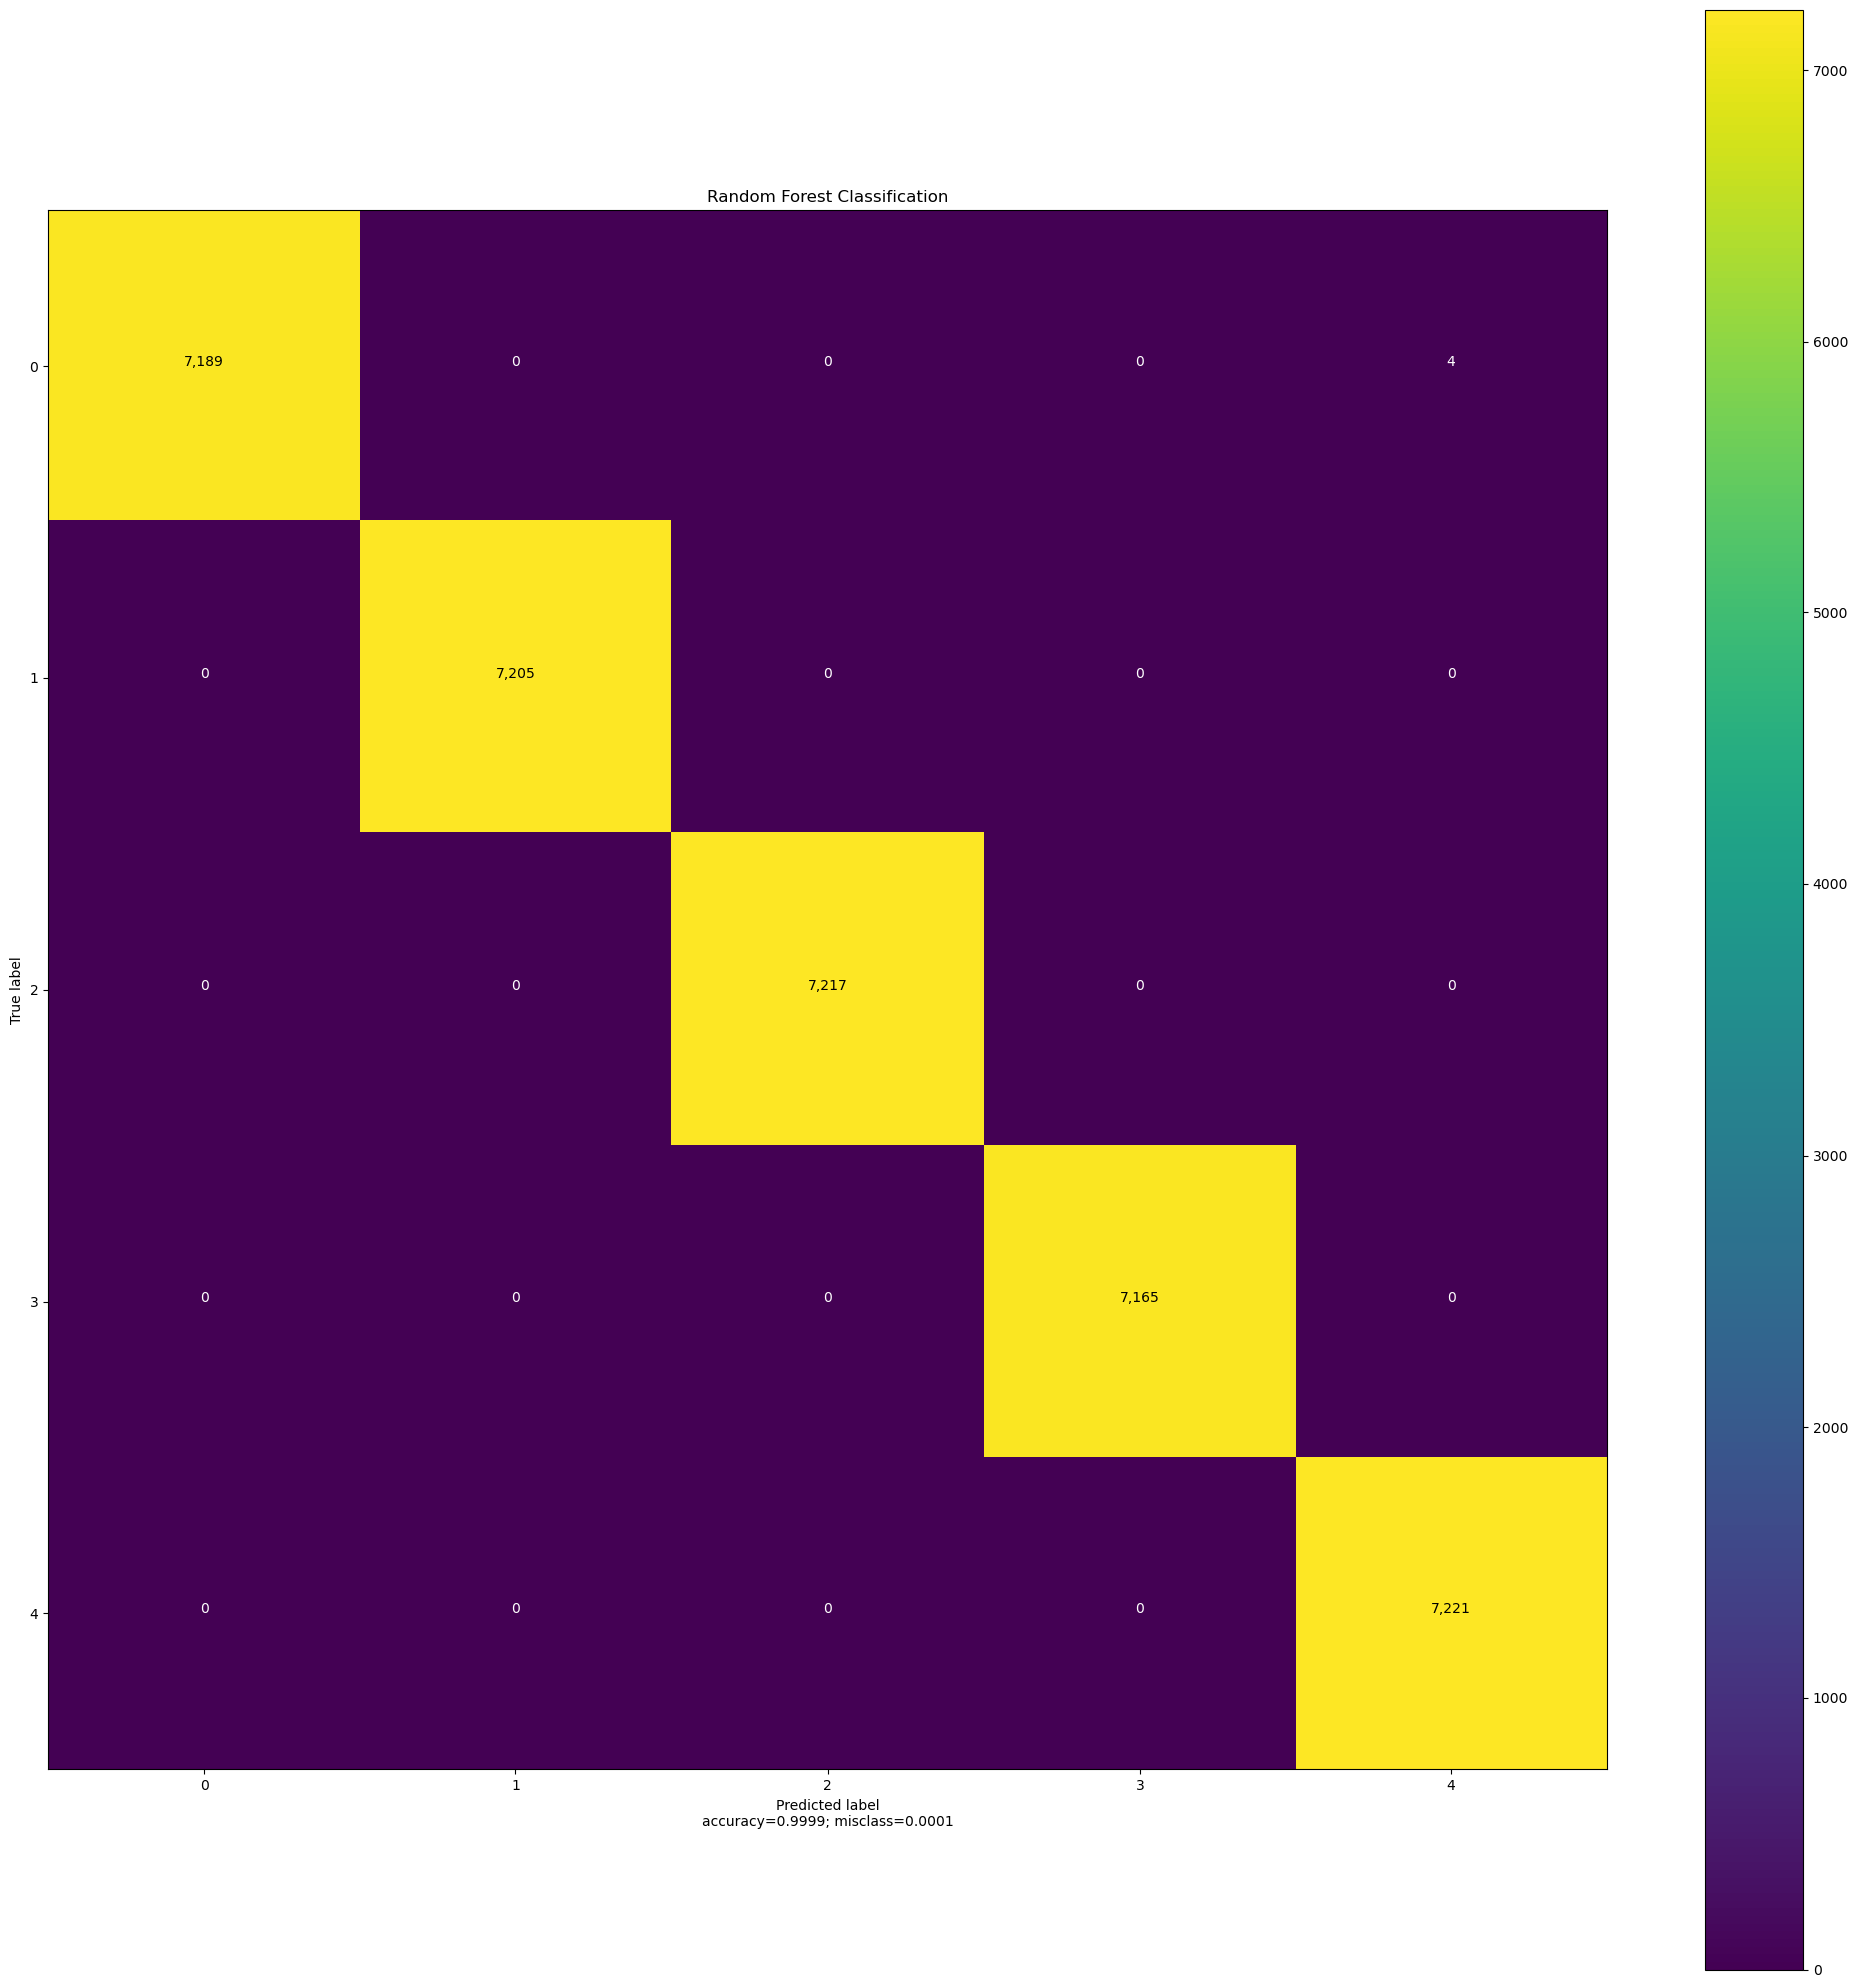

<Figure size 640x480 with 0 Axes>

In [41]:
plot_confusion_matrix(cm=confusion_matrix ,title= 'Random Forest Classification')

In [42]:
Predict_X =  Random_Forest.predict(X_test)
scores = cross_val_score(Random_Forest, X_test, Y_test, cv=7)
accuracy = metrics.accuracy_score(Y_test,Predict_X)
confusion_matrix = metrics.confusion_matrix(Y_test, Predict_X)
classification = metrics.classification_report(Y_test, Predict_X)

In [43]:
print()
print('--------------------------- Results --------------------------------')
print()
print ("Cross Validation Mean Score:" "\n", scores.mean())
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Confusion matrix:" "\n", confusion_matrix)
print()
print("Classification report:" "\n", classification) 
print()


--------------------------- Results --------------------------------

Cross Validation Mean Score:
 0.9985093216268446

Model Accuracy:
 0.9989629917687471

Confusion matrix:
 [[3088    0    0    3    2]
 [   0 3081    0    0    0]
 [   4    0 3065    0    0]
 [   1    0    2 3116    2]
 [   2    0    0    0 3063]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      1.00      1.00      3093
         DDoS       1.00      1.00      1.00      3081
DoS GoldenEye       1.00      1.00      1.00      3069
     DoS Hulk       1.00      1.00      1.00      3121
     PortScan       1.00      1.00      1.00      3065

     accuracy                           1.00     15429
    macro avg       1.00      1.00      1.00     15429
 weighted avg       1.00      1.00      1.00     15429




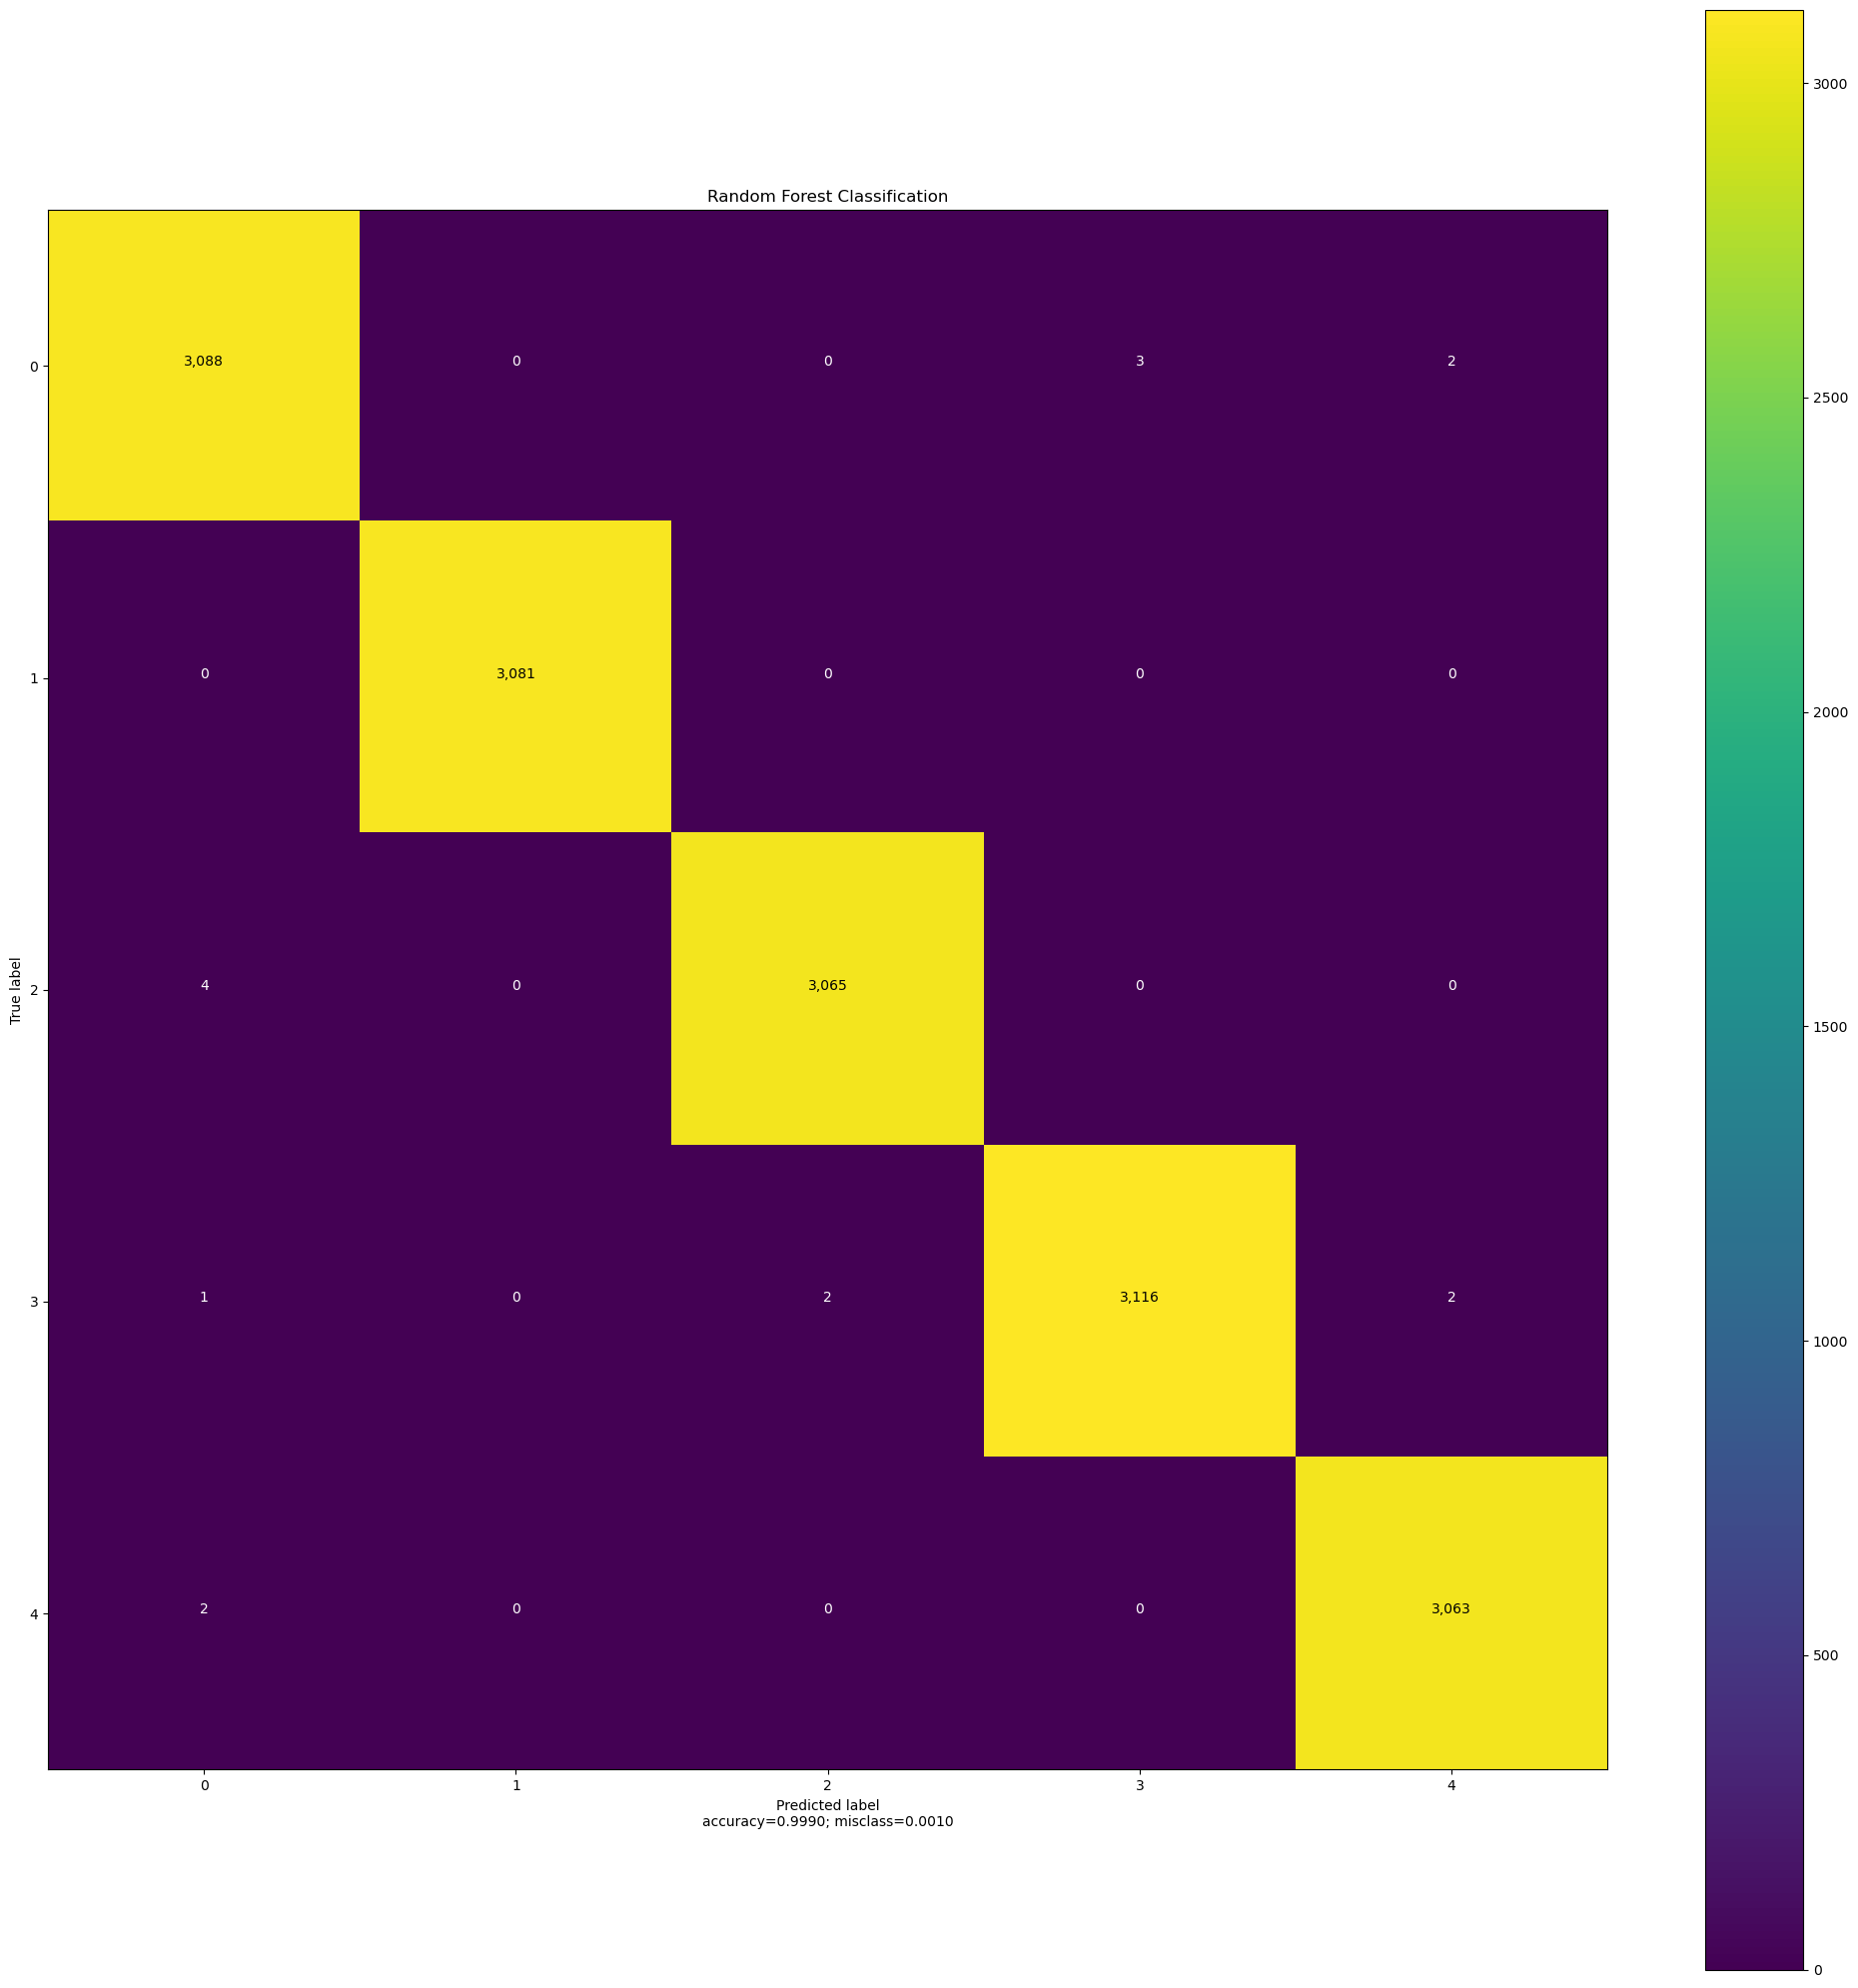

<Figure size 640x480 with 0 Axes>

In [44]:
plot_confusion_matrix(cm=confusion_matrix ,title= 'Random Forest Classification')

Building a predictive system

In [45]:
df.shape

(2496897, 42)

In [50]:
df_new = pd.read_csv("output.csv") 


In [53]:
df_new.head()

,"{""context"":{""category"":""OutboundConnectionTrackerMetrics"",""instanceId"":""MM24GWJQXC"",""referenceId"":""yf0c5y0ffdzcoerd"",""stackId"":""EF14XWWHCI"",""timestamp"":""1683331274000"",""app"":""DDOS"",""unit"":""SECOND""},""statistics"":""{\""n_connections\"":0,\""n_connections_syn_sent\"":0,\""n_connections_syn_ack_rcvd\"":0,\""n_connections_established\"":0,\""n_connections_fin_wait_1\"":0,\""n_connections_fin_wait_2\"":0,\""n_connections_closing\"":0,\""n_connections_closed_wait\"":0,\""n_connections_last_ack\"":0,\""n_connections_time_wait\"":0,\""n_connections_rst_time_wait\"":0,\""n_connection_terminated\"":0,\""n_connection_closed\"":0,\""n_connection_entries\"":0}"",""topTalker"":false}"
0,"{""context"":{""category"":""InboundConnectionTrack..."
1,"{""context"":{""category"":""NetworkRuleMetrics"",""i..."
2,"{""context"":{""category"":""OutboundL3DpiMetrics"",..."
3,"{""context"":{""category"":""OutboundL4DpiMetrics"",..."
4,"{""context"":{""category"":""OutboundL7DpiMetrics"",..."
